In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.svm import OneClassSVM 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [39]:
data = pd.read_csv('predicted_review.csv')

In [57]:
data['True(1)/Deceptive(0)'] = (data['True(1)/Deceptive(0)'] == 'True').astype(int)

In [58]:
data = data.rename(columns={'True(1)/Deceptive(0)':'True'})

In [59]:
data.head()

,Review,True
0,"This place is horrible, we were so excited to ...",1
1,"For being fairly ""fast"" food.. Pei Wei (pronou...",1
2,"I decided to try it out, I'm celiac and theref...",1
3,I'm not saying Pei Wei is the best asian food ...,1
4,Sometimes the food is spot on and delicious an...,1


(array([ 423516.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1554986.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

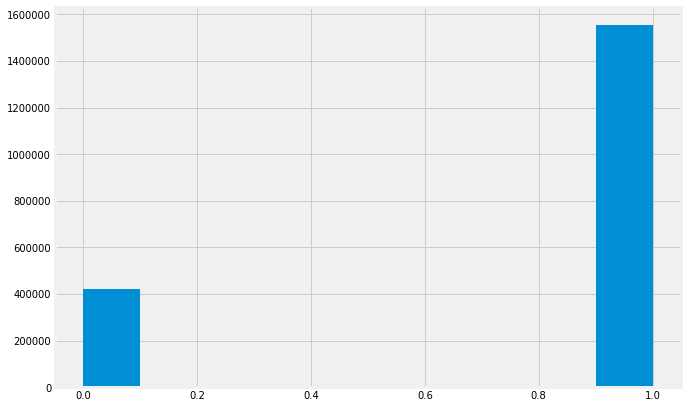

In [73]:
fig,ax = plt.subplots(figsize = (10,7))
plt.hist(data['True'])

In [60]:
true = data[data['True'] == 1]

In [61]:
print(len(true),len(data))

1554986 1978502


In [64]:
print(len(data[data['True'] == 0]))

423516


In [65]:
true = true.sample(50000)

In [66]:
#remove accents
import unicodedata

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

In [67]:
true['Review'] = true['Review'].apply(remove_accents)

In [68]:
#lower case
true['Review'] = true['Review'].str.lower()

In [69]:
#NLTK word tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
true['Tokenized'] = true['Review'].apply(word_tokenize)

In [70]:
true.head()

,Review,True,Tokenized
377107,my family and i had a great time... service wa...,1,"[my, family, and, i, had, a, great, time, ...,..."
696302,"well, i like this cranky ole building and the ...",1,"[well, ,, i, like, this, cranky, ole, building..."
795485,my friend that lives there took me there on we...,1,"[my, friend, that, lives, there, took, me, the..."
1295857,"they make pierogi's from scratch, and so many ...",1,"[they, make, pierogi, 's, from, scratch, ,, an..."
1083598,best trendy hot spot in glendale. i can't beli...,1,"[best, trendy, hot, spot, in, glendale, ., i, ..."


In [51]:
# https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
# from nltk.probability import FreqDist
# fdist = FreqDist(tokenized_word)
# print(fdist)

# fdist.most_common(2)

# import matplotlib.pyplot as plt
# fdist.plot(30,cumulative=False)
# plt.show()

In [74]:
#remove puncs and stopwords
#NEED TO EXPAND stopwords for MAKEUP site
from nltk.corpus import stopwords
import string

stopwords_ = set(stopwords.words('english'))
punctuations_ = set(string.punctuation)

true['Tokenized2'] = true['Tokenized'].apply(lambda x: [item for item in x if item not in stopwords_  and not item in punctuations_])

In [ ]:
#NEED TO REMOVE NUMBERS

In [75]:
true

,Review,True,Tokenized,Tokenized2
377107,my family and i had a great time... service wa...,1,"[my, family, and, i, had, a, great, time, ...,...","[family, great, time, ..., service, fast, frie..."
696302,"well, i like this cranky ole building and the ...",1,"[well, ,, i, like, this, cranky, ole, building...","[well, like, cranky, ole, building, menu, cour..."
795485,my friend that lives there took me there on we...,1,"[my, friend, that, lives, there, took, me, the...","[friend, lives, took, wednesday, labor, day, w..."
1295857,"they make pierogi's from scratch, and so many ...",1,"[they, make, pierogi, 's, from, scratch, ,, an...","[make, pierogi, 's, scratch, many, varieties, ..."
1083598,best trendy hot spot in glendale. i can't beli...,1,"[best, trendy, hot, spot, in, glendale, ., i, ...","[best, trendy, hot, spot, glendale, ca, n't, b..."
...,...,...,...,...
742358,the cabo wabo cantina is another one of those ...,1,"[the, cabo, wabo, cantina, is, another, one, o...","[cabo, wabo, cantina, another, one, tourist, t..."
296348,food was delish! we got the sampler with mac &...,1,"[food, was, delish, !, we, got, the, sampler, ...","[food, delish, got, sampler, mac, cheese, croq..."
651741,been going here since the 90s. the building ha...,1,"[been, going, here, since, the, 90s, ., the, b...","[going, since, 90s, building, changed, food, p..."
682319,"i like chili's, i know what i am getting so i ...",1,"[i, like, chili, 's, ,, i, know, what, i, am, ...","[like, chili, 's, know, getting, like, food, s..."


In [76]:
#stemming/ lemmatization
from nltk.stem.snowball import SnowballStemmer
#using snowball to preserve some words ex: 'better' (so it does not become 'good')
stemmer = SnowballStemmer("english")
true['Stemmed'] = true['Tokenized2'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
#n-gram, might do in the future

In [ ]:
# #detokenize before vectorize
# from nltk.tokenize.treebank import TreebankWordDetokenizer 
# detokenizer = TreebankWordDetokenizer()
# true['Detokenized'] = true['Stemmed'].apply(lambda x: [detokenizer.detokenize(y) for y in x ])

In [77]:
true['Detokenized'] = true['Stemmed'].apply(lambda x: ' '.join([y for y in x ]))
#Detokenized 

In [ ]:
# true['Count'] = true['Detokenized'].apply(lambda x: (true['Detokenized'].value_counts()).loc[x])

In [78]:
true.head()

,Review,True,Tokenized,Tokenized2,Stemmed,Detokenized
377107,my family and i had a great time... service wa...,1,"[my, family, and, i, had, a, great, time, ...,...","[family, great, time, ..., service, fast, frie...","[famili, great, time, ..., servic, fast, frien...",famili great time ... servic fast friend food ...
696302,"well, i like this cranky ole building and the ...",1,"[well, ,, i, like, this, cranky, ole, building...","[well, like, cranky, ole, building, menu, cour...","[well, like, cranki, ole, build, menu, cours, ...",well like cranki ole build menu cours 's direc...
795485,my friend that lives there took me there on we...,1,"[my, friend, that, lives, there, took, me, the...","[friend, lives, took, wednesday, labor, day, w...","[friend, live, took, wednesday, labor, day, we...",friend live took wednesday labor day weekend l...
1295857,"they make pierogi's from scratch, and so many ...",1,"[they, make, pierogi, 's, from, scratch, ,, an...","[make, pierogi, 's, scratch, many, varieties, ...","[make, pierogi, 's, scratch, mani, varieti, fi...",make pierogi 's scratch mani varieti find tast...
1083598,best trendy hot spot in glendale. i can't beli...,1,"[best, trendy, hot, spot, in, glendale, ., i, ...","[best, trendy, hot, spot, glendale, ca, n't, b...","[best, trendi, hot, spot, glendal, ca, n't, be...",best trendi hot spot glendal ca n't believ ve ...


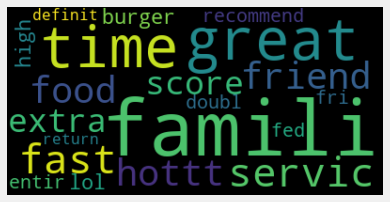

In [172]:
# Start with one review:
text = true['Detokenized'][377107]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [173]:
text = " ".join(review for review in true.Detokenized)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 18278890 words in the combination of all review.


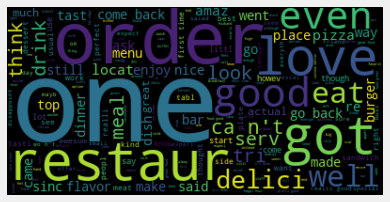

In [174]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features= 300)
doc_tfidf_matrix = tfidf.fit_transform(true['Detokenized']).todense()

In [80]:
vector = pd.DataFrame(doc_tfidf_matrix, columns = tfidf.get_feature_names())

In [81]:
vector

,10,20,actual,almost,also,alway,amaz,anoth,anyth,appet,...,wife,wine,wing,without,wo,wonder,work,worth,would,year
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.114399,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.165103
2,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.158052,0.000000
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.116582,0.0,0.000000,0.000000,0.000000,0.054328,0.060086,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.053525,0.0,0.037058,0.000000
49996,0.0,0.0,0.247307,0.0,0.000000,0.000000,0.206587,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
49997,0.0,0.0,0.000000,0.0,0.172575,0.200177,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
49998,0.0,0.0,0.000000,0.0,0.000000,0.317752,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [82]:
vector.columns

Index(['10', '20', 'actual', 'almost', 'also', 'alway', 'amaz', 'anoth',
       'anyth', 'appet',
       ...
       'wife', 'wine', 'wing', 'without', 'wo', 'wonder', 'work', 'worth',
       'would', 'year'],
      dtype='object', length=300)

In [83]:
# import matplotlib.pyplot as plt

# fig,ax = plt.subplots(figsize = (10,7))
# plt.scatter(vector.iloc[0,:], vector.columns)
# plt.tight_layout()

In [128]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test = train_test_split(vector, test_size=.2) 
estimator= svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
estimator.fit(X_train)
y_pred_test = estimator.predict(X_test)

In [105]:
y_pred_test.shape

(10000,)

In [106]:
y_test = np.ones(shape=(10000,))
y_test

array([1., 1., 1., ..., 1., 1., 1.])

(array([ 977.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9023.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

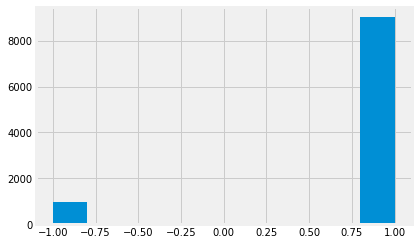

In [107]:
fig,ax = plt.subplots()
plt.hist(y_pred_test)

In [108]:
unique, counts = np.unique(y_pred_test, return_counts=True)

dict(zip(unique, counts))
counts

array([ 977, 9023])

<BarContainer object of 2 artists>

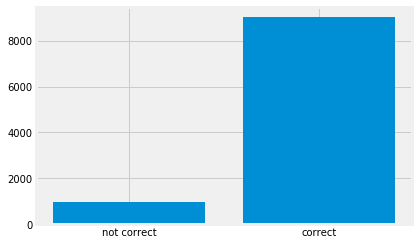

In [109]:
fig,ax = plt.subplots()
plt.bar(['not correct','correct'], counts)


In [110]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

In [111]:
classification_report(y_test, y_pred_test)

/Users/suchaya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        -1.0       0.00      0.00      0.00         0\n         1.0       1.00      0.90      0.95     10000\n\n    accuracy                           0.90     10000\n   macro avg       0.50      0.45      0.47     10000\nweighted avg       1.00      0.90      0.95     10000\n'

In [112]:
accuracy_score(y_test, y_pred_test)

0.9023

In [113]:
confusion_matrix(y_test, y_pred_test)

array([[   0,    0],
       [ 977, 9023]])

**try testing using only fake reviews with the model**

In [114]:
# try testing only fake reviews with the model
false = data[data['True'] == 0].sample(50000)
false['Review'] = false['Review'].apply(remove_accents)
false['Review'] = false['Review'].str.lower()

In [115]:
false['Tokenized'] = false['Review'].apply(word_tokenize)

In [116]:
false['Tokenized2'] = false['Tokenized'].apply(lambda x: [item for item in x if item not in stopwords_  and not item in punctuations_])

In [117]:
stemmer = SnowballStemmer("english")
false['Stemmed'] = false['Tokenized2'].apply(lambda x: [stemmer.stem(y) for y in x])

In [118]:
false['Detokenized'] = false['Stemmed'].apply(lambda x: ' '.join([y for y in x ]))

In [119]:
false.head()

,Review,True,Tokenized,Tokenized2,Stemmed,Detokenized
524720,casanova's is much more than an awesome pizza ...,0,"[casanova, 's, is, much, more, than, an, aweso...","[casanova, 's, much, awesome, pizza, joint, 's...","[casanova, 's, much, awesom, pizza, joint, 's,...",casanova 's much awesom pizza joint 's awesom ...
477348,we randomly tried this restaurant while walkin...,0,"[we, randomly, tried, this, restaurant, while,...","[randomly, tried, restaurant, walking, around,...","[random, tri, restaur, walk, around, venetian,...",random tri restaur walk around venetian wonder...
1032307,"pizza is very good and a great price, i wish t...",0,"[pizza, is, very, good, and, a, great, price, ...","[pizza, good, great, price, wish, bigger, pizz...","[pizza, good, great, price, wish, bigger, pizz...",pizza good great price wish bigger pizza diffe...
492848,always good food. great for my wife who likes ...,0,"[always, good, food, ., great, for, my, wife, ...","[always, good, food, great, wife, likes, fried...","[alway, good, food, great, wife, like, fri, fo...",alway good food great wife like fri food ca n'...
23408,"great atmosphere, good food and good service. ...",0,"[great, atmosphere, ,, good, food, and, good, ...","[great, atmosphere, good, food, good, service,...","[great, atmospher, good, food, good, servic, b...",great atmospher good food good servic belmont ...


In [120]:
tfidf2 = TfidfVectorizer(max_features= 300)
doc_tfidf_matrix2 = tfidf2.fit_transform(false['Detokenized']).todense()

In [121]:
vector2 = pd.DataFrame(doc_tfidf_matrix2, columns = tfidf2.get_feature_names())

In [139]:
X_train_2, X_test_2 = train_test_split(vector2, test_size=.2) 
# estimator= svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
# estimator.fit(X_train)
y_pred_test_2 = estimator.predict(X_test_2)

In [148]:
y_test_2 = np.negative(np.ones(shape=(10000,)))

In [149]:
y_test_2

array([-1., -1., -1., ..., -1., -1., -1.])

In [150]:
y_pred_test_2

array([-1,  1,  1, ...,  1, -1,  1])

In [151]:
unique, counts = np.unique(y_pred_test_2, return_counts=True)

dict(zip(unique, counts))

{-1: 4257, 1: 5743}

<BarContainer object of 2 artists>

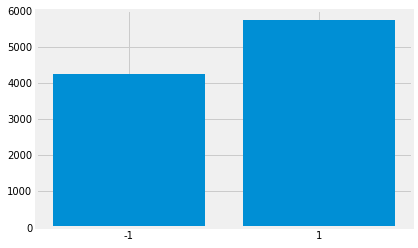

In [152]:
fig,ax = plt.subplots()
plt.bar(['-1','1'], counts)


In [153]:
accuracy_score(y_test_2, y_pred_test_2)

0.4257

In [154]:
confusion_matrix(y_test_2, y_pred_test_2) 

array([[4257, 5743],
       [   0,    0]])

In [176]:
classification_report(y_test_2, y_pred_test_2)

/Users/suchaya/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        -1.0       1.00      0.43      0.60     10000\n         1.0       0.00      0.00      0.00         0\n\n    accuracy                           0.43     10000\n   macro avg       0.50      0.21      0.30     10000\nweighted avg       1.00      0.43      0.60     10000\n'

**try testing half fake, half true reviews**

In [183]:
mix = pd.concat([true.Detokenized.sample(25000), false.Detokenized.sample(25000)])

In [186]:
mix = mix.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [193]:
mix.head()

,Detokenized
880175,greg f said still worst qdoba charlott portion...
1374581,took wife mother mother 's day cortez room gol...
1906371,bewar food disgust ... ..nasti red cheap egg r...
870862,waffl die belgium say almost delici bit pricey...
312894,great place ... sold new owner epic fail


In [199]:
([1]*5)+([-1]*5)


[1, 1, 1, 1, 1, -1, -1, -1, -1, -1]

In [200]:
mix['y'] = ([1]*25000)+([-1]*25000)

In [201]:
mix

,Detokenized,y
880175,greg f said still worst qdoba charlott portion...,1
1374581,took wife mother mother 's day cortez room gol...,1
1906371,bewar food disgust ... ..nasti red cheap egg r...,1
870862,waffl die belgium say almost delici bit pricey...,1
312894,great place ... sold new owner epic fail,1
...,...,...
628345,super fresh sushi awesom authent great servic ...,-1
1225177,walk differ restaur walk virgil decid go inste...,-1
991120,great burger fri take town guest everi chanc g...,-1
247957,stop lunch great portion realli larg 's delici...,-1


In [234]:
tfidf3 = TfidfVectorizer(max_features =300)
doc_tfidf_matrix3 = tfidf3.fit_transform(mix['Detokenized']).todense()

In [235]:
vector3 = pd.DataFrame(doc_tfidf_matrix3, columns = tfidf3.get_feature_names())

In [236]:
vector3['label'] = ([1]*25000)+([-1]*25000)

In [237]:
vector3

,10,20,absolut,actual,almost,also,alway,amaz,anoth,anyth,...,wine,wing,without,wo,wonder,work,worth,would,year,label
0,0.0,0.0,0.0,0.264692,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.230064,0.000000,0.0,1
1,0.0,0.0,0.0,0.000000,0.000000,0.131965,0.0,0.0,0.176166,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1
3,0.0,0.0,0.0,0.000000,0.299644,0.195524,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.246603,0.000000,0.0,1
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,-1
49996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.209816,0.0,-1
49997,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,-1
49998,0.0,0.0,0.0,0.000000,0.000000,0.113578,0.0,0.0,0.000000,0.0,...,0.0,0.178056,0.0,0.0,0.0,0.0,0.000000,0.207678,0.0,-1


In [238]:
X = vector3.iloc[:,:-1]
y = vector3.iloc[:,-1]

In [239]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X,y, test_size=.2) 
y_pred_test_3 = estimator.predict(X_test_3)

In [240]:
accuracy_score(y_test_3, y_pred_test_3) 

0.5564

In [241]:
confusion_matrix(y_test_3, y_pred_test_3) 

array([[1673, 3316],
       [1120, 3891]])

# Sephora - use to test the model on my real data

In [156]:
sephora = pd.read_csv('Sephora_review.csv')

In [157]:
sephora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
product_id           1000 non-null object
review_title         901 non-null object
review_text          1000 non-null object
rating               1000 non-null int64
age_range            0 non-null float64
skin_type            417 non-null object
skin_tone            112 non-null object
eye_color            0 non-null float64
reviewer_username    1000 non-null object
tags                 447 non-null object
review_id            1000 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [158]:
sephora.head()

,product_id,review_title,review_text,rating,age_range,skin_type,skin_tone,eye_color,reviewer_username,tags,review_id
0,P38217,Worth the money,"Sometimes I stray from this cleanser, but I al...",5,NaN,normal,light,NaN,katechatte,"{foamy,exfoliating}",6611717f-2636-4756-bf36-66c81cc267a7
1,P38217,Great,I am a 41 year old African American woman with...,5,NaN,combination,deep,NaN,snook41,{foamy},e7d3307e-02ff-45a1-8fc3-6bd628bedd86
2,P38217,Great Product,I'm really enjoying this product. Received a s...,5,NaN,combination,olive,NaN,wahinewarrior,"{foamy,milky,exfoliating}",4188d728-fde6-4d06-984e-164cca2b8781
3,P38217,"Nice, but not great for combination skin","I tried this cleanser at a friends house, and ...",3,NaN,combination,fair,NaN,jenlines22,"{hydrating,creamy}",248c904c-6e30-4929-8228-87b03ad7a921
4,P38217,great moisturizer,leaves the skin feeling fresh and revived... j...,5,NaN,dry,light,NaN,jessea,{exfoliating},654bdb99-9371-4440-a540-0dd2a73da339
